[Reference](https://towardsdatascience.com/time-series-complexity-analysis-using-entropy-ec49a4aaff11)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy_practice(X):
    number_of_values = list(set(X))
    N = len(X)
    p_s = 0
    for x in number_of_values:
        n_x = len(np.where(X==x)[0])
        p_x = n_x/N
        p_s = p_s + p_x*np.log(p_x)
    return -p_s

In [3]:
p_0 = 0.5
X = np.random.choice([0,1],p=[p_0,1-p_0],size=100)
print('The number of 0 in the time series is %i, out of %i'%(len(np.where(X==0)[0]),len(X)))
print('The number of 1 in the time series is %i, out of %i'%(len(np.where(X==1)[0]),len(X)))

The number of 0 in the time series is 42, out of 100
The number of 1 in the time series is 58, out of 100


In [4]:
def entropy(p):
    return -(p*np.log(p)+(1-p)*np.log(1-p))

In [5]:
p_0 = 0.5
X = np.random.choice([0,1],p=[p_0,1-p_0],size=10000)
print('The number of 0 in the time series is %i, out of %i'%(len(np.where(X==0)[0]),len(X)))
print('The number of 1 in the time series is %i, out of %i'%(len(np.where(X==1)[0]),len(X)))
print('The theoretical entropy for p = %.1f is %.2f'%(p_0,entropy(p_0)))
print('The theoretical entropy for p = %.1f is %.2f'%(p_0,entropy_practice(X)))

The number of 0 in the time series is 4983, out of 10000
The number of 1 in the time series is 5017, out of 10000
The theoretical entropy for p = 0.5 is 0.69
The theoretical entropy for p = 0.5 is 0.69


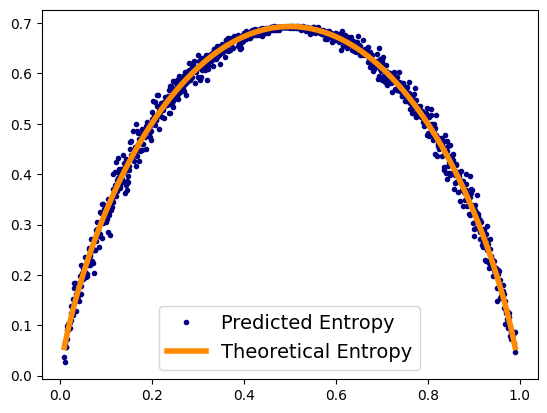

In [6]:
real_entropies = []
pred_entropies = []
Ps= np.linspace(0.01,0.99,1000)
for p_0 in Ps:
    X = np.random.choice([0,1],p=[p_0,1-p_0],size=1000)
    real_entropies.append(entropy(p_0))
    pred_entropies.append(entropy_practice(X))
plt.plot(Ps, pred_entropies,'.',label='Predicted Entropy',color='navy')
plt.plot(Ps, real_entropies,lw=4,color='darkorange',label='Theoretical Entropy')
plt.legend(fontsize=14)

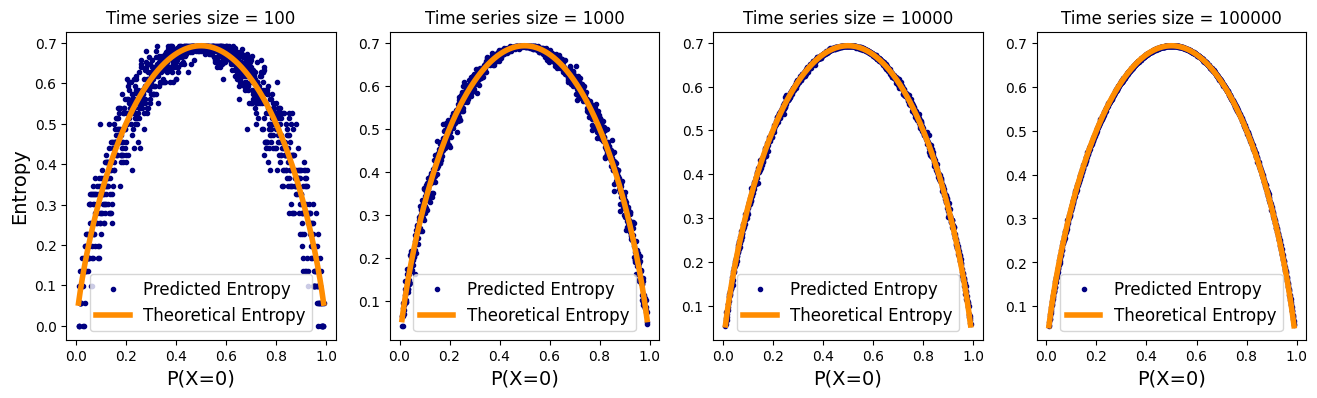

In [7]:
sizes = [100,1000,10000,10**5]
plt.figure(figsize=(16,4))
for i in range(len(sizes)):
    plt.subplot(1,len(sizes),i+1)
    plt.title('Time series size = %i'%(sizes[i]))
    real_entropies = []
    pred_entropies = []
    Ps= np.linspace(0.01,0.99,1000)
    for p_0 in Ps:
        X = np.random.choice([0,1],p=[p_0,1-p_0],size=sizes[i])
        real_entropies.append(entropy(p_0))
        pred_entropies.append(entropy_practice(X))
    plt.plot(Ps, pred_entropies,'.',label='Predicted Entropy',color='navy')
    plt.plot(Ps, real_entropies,lw=4,color='darkorange',label='Theoretical Entropy')
    plt.xlabel('P(X=0)',fontsize=14)
    if i==0:
        plt.ylabel('Entropy',fontsize=14)
    plt.legend(fontsize=12)

In [8]:
p_vector = np.random.choice(100,size=3)
p_vector = p_vector/sum(p_vector)
print('The generated probability vector for a 3 case time series is p=', p_vector)

The generated probability vector for a 3 case time series is p= [0.55223881 0.21641791 0.23134328]


In [9]:
def entropy(p_vector):
    p_0 = p_vector[0]*np.log(p_vector[0])
    for p in p_vector[1:]:
        p_0 = p_0 + p*np.log(p)
    return -p_0

In [10]:
entropy([0.5,0.5])

0.6931471805599453

In [11]:
p_vector = np.random.choice(100,size=3)
p_vector = p_vector/sum(p_vector)
X = np.random.choice([0,1,2],p=p_vector,size=10000)
print('The theoretical entropy for p_0 = %.2f, p_1 = %.2f,p_2 = %.2f, is %.2f'%(p_vector[0],p_vector[1],p_vector[2],entropy(p_vector)))
print('The predicted entropy for p_0 = %.2f, p_1 = %.2f,p_2 = %.2f, is %.2f'%(p_vector[0],p_vector[1],p_vector[2],entropy_practice(X)))

The theoretical entropy for p_0 = 0.19, p_1 = 0.37,p_2 = 0.43, is 1.05
The predicted entropy for p_0 = 0.19, p_1 = 0.37,p_2 = 0.43, is 1.05


Text(0, 0.5, 'Predicted Entropy')

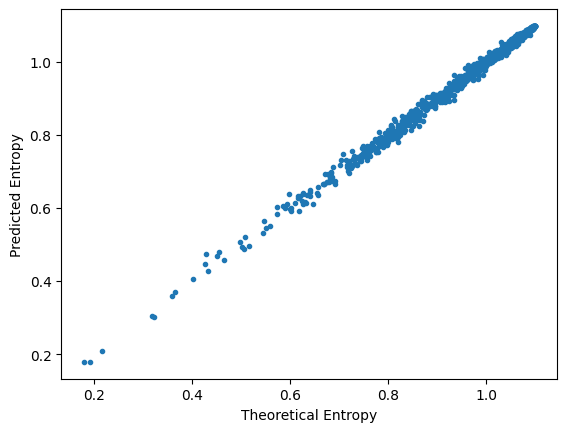

In [12]:
real_entropies = []
pred_entropies = []
for i in range(1000):
    p_vector = np.random.choice(100,size=3)
    p_vector = p_vector+1
    p_vector = p_vector/sum(p_vector)
    X = np.random.choice([0,1,2],p=p_vector,size=2000)
    real_entropies.append(entropy(p_vector))
    pred_entropies.append(entropy_practice(X))
plt.plot(real_entropies,pred_entropies,'.')
plt.xlabel('Theoretical Entropy')
plt.ylabel('Predicted Entropy')